# A KNN Classification Research Based On User Knowledge Dataset

## Introduction

User knowledge dataset (Kahraman, 2013) is about developing intuitive knowledge classifier and modeling of users' domain dependent data in web (Kahrman, 2009).The goal of this project is to predict user knowledge by coming up with a model based on predictor variables to classify the level of user knowledge. Alongside factors such as exam performance, degree of study time and other such variables, we want to explore the effect these factors have on predicting the user knowledge level (UNS). The project will answer the question that given a random user vector with five corresponding data (STG, SCG, LPR, PEG), we can classify which study level the user belongs to. The dataset has 6 columns (5 variables and 1 classifier), which are as following:

- STG: The degree of study time for goal object materails
- SCG: The degree of repetition number of user for goal object materails
- STR: The degree of study time of user for related objects with goal object
- LPR: The exam performance of user for related objects with goal object
- PEG: The exam performance of user for goal objects
- UNS: The knowledge level of user

The dataset is avaliable here: https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling

## Method & Results

In [10]:
# loading in the packages that we will need
library(readxl)
library(tidyverse)
library(repr)
library(caret)
library(forcats)

### Read the data set

In [11]:
user_data <- read_csv("https://raw.githubusercontent.com/JossieJiang599/user-knowledge/master/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN-5%20(2).csv") %>% data.frame()
head(user_data)

Warning message:
“Missing column names filled in: 'X7' [7], 'X8' [8], 'X9' [9]”Parsed with column specification:
cols(
  STG = col_double(),
  SCG = col_double(),
  STR = col_double(),
  LPR = col_double(),
  PEG = col_double(),
  UNS = col_character(),
  X7 = col_logical(),
  X8 = col_logical(),
  X9 = col_logical()
)


STG,SCG,STR,LPR,PEG,UNS,X7,X8,X9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,NA
0.08,0.08,0.10,0.24,0.90,High,NA,NA,NA
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,NA
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,NA
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,NA
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,NA


### Wrangling and cleaning the data

In [3]:
# select the columns that we are interested in
user_data <- user_data %>%
  select(STG, SCG, STR, LPR, PEG, UNS)

# calculating the number of missing data
sum(is.na(user_data))

head(user_data)

[1] 0

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


Explaination: As we can see, this dataset does not contain missing data, and the dataset is quite tidy (each row is a single observation, each column is a single variable, and each value is a single cell ). Therefore, we don't need to do much with the dataset.

### Splitting the data set to training set and test set

In [4]:
set.seed(1234)
set_row <- mutate(user_data, UNS = as.factor(UNS)) %>% 
             unlist() %>%
             createDataPartition(p = 0.75, list = FALSE)

training_set <- user_data %>% slice(set_row)
test_set <- user_data %>% slice(-set_row)
head(training_set)
head(test_set)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.08,0.08,0.10,0.24,0.90,High
0.10,0.10,0.15,0.65,0.30,Middle
0.09,0.15,0.40,0.10,0.66,Middle
0.10,0.10,0.43,0.29,0.56,Middle
0.00,0.00,0.50,0.20,0.85,High
0.06,0.06,0.51,0.41,0.30,Low


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.06,0.06,0.05,0.25,0.33,Low
0.08,0.08,0.08,0.98,0.24,Low
0.15,0.02,0.34,0.40,0.01,very_low
0.20,0.14,0.35,0.72,0.25,Low
0.18,0.18,0.55,0.30,0.81,High


### Exploratory Data Analysis

In [5]:
set.seed(1234)
summary_table <- training_set %>%
 group_by(UNS) %>%
 summarize(n=n())

mean_for_each_class <- training_set %>%
      group_by(UNS) %>%
      summarize(STG_mean = mean(STG), 
                SCG_mean = mean(SCG),
                STR_mean = mean(STR),
                LPR_mean = mean(LPR),
                PEG_mean = mean(PEG))

exploratory <- merge(summary_table, mean_for_each_class)
exploratory

UNS,n,STG_mean,SCG_mean,STR_mean,LPR_mean,PEG_mean
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,53,0.4113396,0.4251132,0.4935849,0.4973585,0.7773585
Low,57,0.3326842,0.3654912,0.4278947,0.5031579,0.2316316
Middle,65,0.3862769,0.3863385,0.5086154,0.3553846,0.5369231
very_low,18,0.3321667,0.2197222,0.3683333,0.3655556,0.1027778


### Visualizing the data set

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


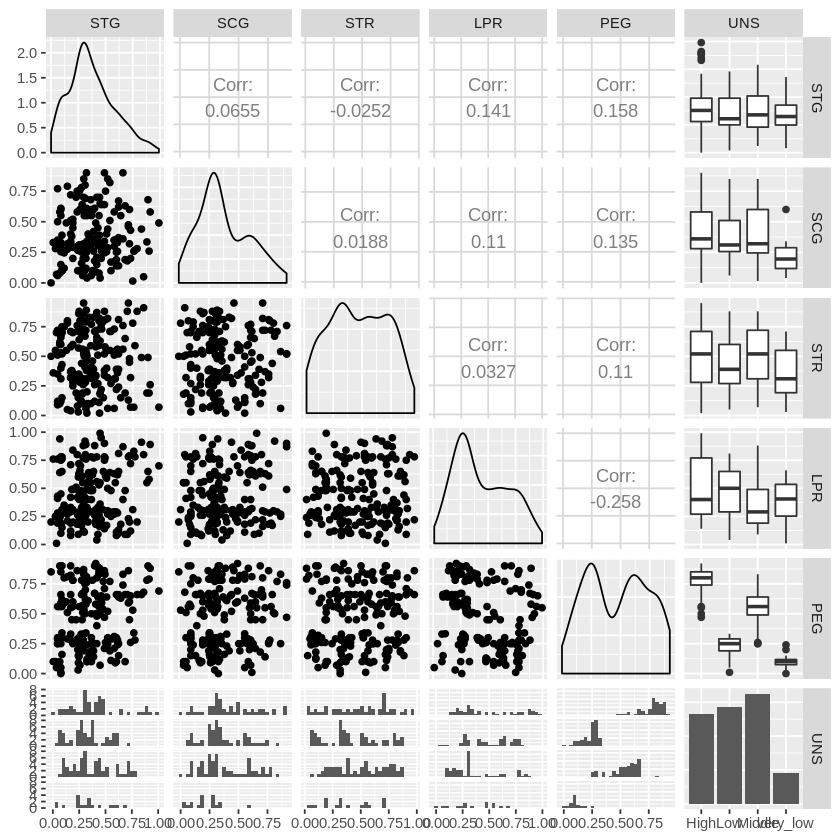

In [6]:
# load in package
library(GGally)

# do visualization
vis_plot <- training_set %>%
  ggpairs()
vis_plot

### Classification Analysis

#### Utilizing cross validation to choose the optimal k

Explaination: From the visualization plot above, we can observe that none of the viriables(expect UNS) has clear positive/negative relationship with the class(UNS), therefore, we will use all of the viriables as our predictors in order to enhance the accuracy of prediction.

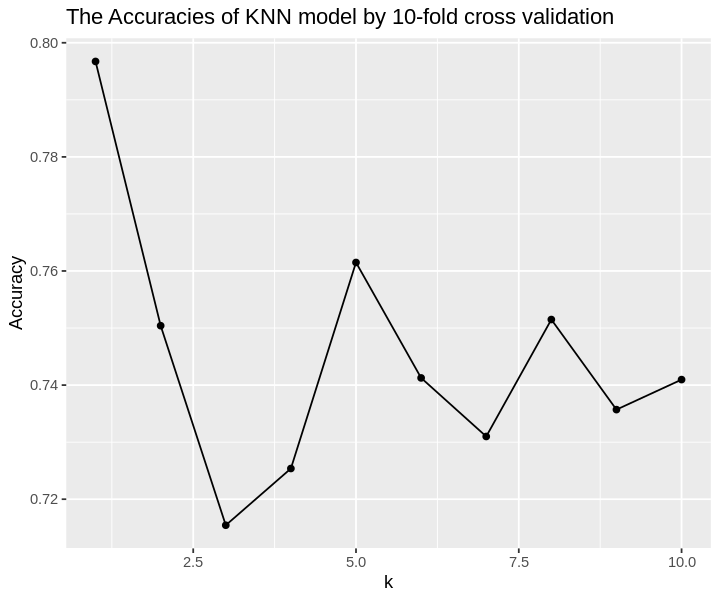

In [7]:
set.seed(1234)

# Doing scale and Standardization
scale_transformer <- preProcess(training_set, method = c("center", "scale")) 
training_set <- predict(scale_transformer, training_set)
test_set <- predict(scale_transformer, test_set)

X_train <- training_set %>% 
  select(-UNS) %>% 
  data.frame()
Y_train <- training_set %>% 
  select(UNS) %>% 
  unlist()
X_test <- test_set %>%
  select(-UNS) %>%
  data.frame()
Y_test <- test_set %>%
  select(UNS) %>%
  unlist()

# Excute 10-fold cross validation
train_control <- trainControl(method = "cv", number = 10)
k_lots = data.frame(k = seq(from = 1, to = 10, by = 1))
knn_model_cv_10fold <- train(x = X_train,
                       y = Y_train,
                       method = "knn",
                       tuneGrid = k_lots,
                       trControl = train_control)

# visualizing results
knn_model_cv_10fold_plot <- ggplot(knn_model_cv_10fold$results, aes(x = k, y = Accuracy)) +
                            geom_point() +
                            geom_line() +
                            ggtitle("The Accuracies of KNN model by 10-fold cross validation")
options(repr.plot.width = 6, repr.plot.height = 5)
knn_model_cv_10fold_plot

#### Using the optimal k to train knn classifier & predict

In [8]:
set.seed(1234)

# choose the optimal k
k = data.frame(k = knn_model_cv_10fold$bestTune$k)

# train knn clssifier
knn_model_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

# predict on test_set 
test_pred <- predict(knn_model_10fold, X_test) %>% unlist()
test_results <- confusionMatrix(table(test_pred, Y_test))

# report the accuracy of this prediction
test_results

Confusion Matrix and Statistics

          Y_test
test_pred  High Low Middle very_low
  High        8   0      2        0
  Low         0  18      2        2
  Middle      2   3     18        0
  very_low    0   5      1        4

Overall Statistics
                                          
               Accuracy : 0.7385          
                 95% CI : (0.6146, 0.8397)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : 3.237e-08       
                                          
                  Kappa : 0.6272          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: High Class: Low Class: Middle Class: very_low
Sensitivity               0.8000     0.6923        0.7826         0.66667
Specificity               0.9636     0.8974        0.8810         0.89831
Pos Pred Value            0.8000     0.8182        0.7826         0.40000
Neg Pred Value            0.9636     0.8140 

### Visualization of classification analysis

Explaination: We will visualize the classification analysis by visualizing the performance of the classificaiton on per class in test set.

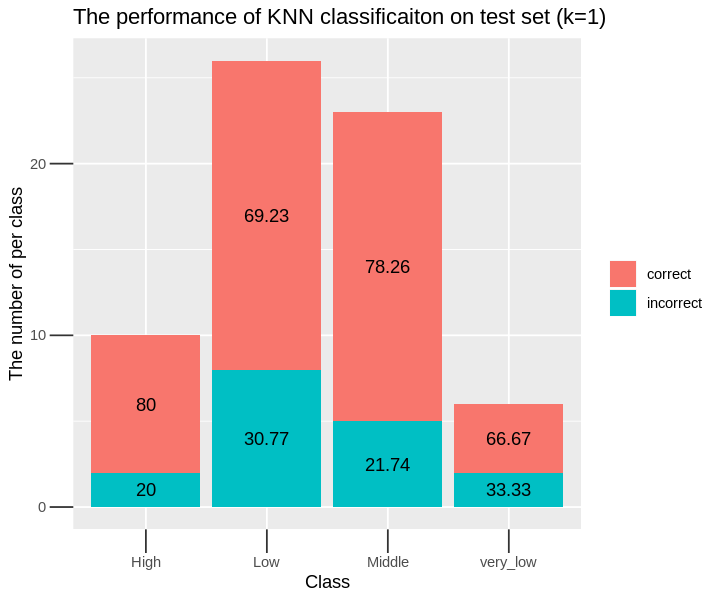

In [9]:
set.seed(1234)

Y_test <- Y_test %>% unlist
Y_pred <- test_pred  %>% unlist
results <- bind_cols(Y_test= Y_test, Y_pred = Y_pred)

correct_counts <- results %>% 
  filter(Y_test == Y_pred) %>% 
  group_by(Y_test) %>% 
  summarize(n_correct = n())
total_counts <- results %>% 
  group_by(Y_test) %>% 
  summarize(n_total = n())
classification_results <- merge(correct_counts, total_counts) %>%
  mutate(n_incorrect = n_total - n_correct)
colnames(classification_results) <- c("class", "correct", "total", "incorrect")

classification_results <- classification_results %>% 
  select(-total) %>%
  gather(key = predict_result, value = n, correct, incorrect) %>%
  group_by(class) %>% 
  mutate(count=sum(n)) %>% 
  mutate(freq=round(100*n/count,2))

# plot
visualization <- classification_results %>%
  ggplot(aes(x = class, y = n, fill = predict_result)) +
  geom_bar(stat="identity",position="stack") +
  labs(x = "Class", y = "The number of per class") +
  ggtitle("The performance of KNN classificaiton on test set (k=1)") +
  theme(axis.ticks.length=unit(0.5,'cm'))+
  guides(fill=guide_legend(title=NULL)) +
  geom_text(aes(label= freq), position=position_stack(vjust=0.5))


visualization

Explaination: The numbers in the bar represents the ratio of the colored part of the entire bar.

## Discussion

### Summary

We mainly used KNN classification to predict the knowledge level of users. We chose the optimal k(k=1), which has the highest accuracy, as our k to train the KNN classification, and the accuracy of the classification is 73.85%. By visualizing the classification analysis, we further discover this classifier did best predict on class - High, which has the highest correctness percentage - 80%, and it did worse on class - very_low, which only has 66.67% of the time. And other two correctness of classes is close to the classification accuracy. 

The methods allowed us to easily understand and process the data. There was an optimal number of predictors which increased the accuracy of the model. Moreover, the classes being fairly balanced made the model perform well. Overall, this classification has done well to predict data in this dataset and in doing so, has achieved our aim and confirmed our hypothesis.


### Expectations & Impacts & Future questions

In today's society there is a lot of pressure on students to perform well in academics. Lots of students fail out of school due to personal problems or poor educational system (Cooper & Foy, 1969). Personal problems can be challenging to mitigate but schools should make sure they are doing their part to sustain a high quality of education. This study performed shows which factors have influenced the most to help a student achieve optimal academic expectations. By learning which factors and study methods have the most influence, educators can fine-tune teaching methods to increase the percentage of students who succeed.

Another point of discussion is prerequisite knowledge of the student can influence the outcome of the study. Students who have already have knowledge of the subject do not need to spend as much time studying or practicing to achieve academic success. Students who took calculus in high school did not spend as much time on their calculus coursework as those who did not take calculus, but they were just as motivated to do well in the class and they did not miss class any more frequently (Gibson 2013). When making conclusions, all factors must be taken into consideration. 

The results from the user knowledge study will also serve as the basis for further research into what exactly is required of students with regard to improving their academic prowess. The findings will help to get a fair, data-driven analogy of the topic and provide a good base for looking into how productivity can be improved in academics. A future research question could be “What factors influence the teaching knowledge of educators?”. This is a relevant topic since the quality of educators also play a big role in the knowledge level of students. 

## References

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Kahraman, H. T. (2009). Designing and Application of Web-Based Adaptive Intelligent Education System. Gazi University Ph. D. Thesis, Turkey, 1-156.

Cooper, B. and Foy, J. M. (1969). “Students' Study Habits, Attitudes and Academic Attainment”. 

Gibson, M. (2013). Motivation and study habits of college calculus students: Does studying calculus in high school make a difference?